In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

In [4]:
data = pd.read_csv('train.csv')
data.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0      42420.0  South  FUR-BO-10001798        Furniture    Bookcases   
1      42420.0  South  FUR-CH-10000454        Furniture       Chairs   
2      90036.0   West  OFF-LA-10000240  Office Supplies       Labels   
3      33311.0  South  FUR-TA-10000577        Furniture       Tables   
4      33311.0  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  
0                  Bush Somerset Collection Bookcase  261.9600  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2  Self-Adhesive Address Labels for Typewriters b...   14.6200  
3      Bretford CR4500 Series Slim Rectangular Table  957.5775  
4                     Eldon Fold 'N Roll Cart System   22.3680

In [5]:
print('Dataframe Shape: ', data.shape)
print()

print('Dataframe columns: ', data.columns)
print()

print('Unique Order IDs:', data['Order ID'].unique().shape[0])
print()

print('Unique Customer IDs:', data['Customer ID'].unique().shape[0])
print()

print('Unique Product IDs:', data['Product ID'].unique().shape[0])

Dataframe Shape:  (9800, 18)

Dataframe columns:  Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

Unique Order IDs: 4922

Unique Customer IDs: 793

Unique Product IDs: 1861


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [7]:
data.duplicated().sum()

0

In [8]:
del data['Row ID']
del data['Postal Code']
del data['Product ID']

In [9]:
data.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [10]:
print("Mean Sales Value:", data['Sales'].mean())
print("Median Sales Value:", data['Sales'].median())
print("Standard Deviation of Sales Value:", data['Sales'].std())
print("Minimum Sales Value:", data['Sales'].min())
print("Maximum Sales Value:",data['Sales'].max())

Mean Sales Value: 230.7690594591837
Median Sales Value: 54.489999999999995
Standard Deviation of Sales Value: 626.6518748388042
Minimum Sales Value: 0.444
Maximum Sales Value: 22638.48


In [11]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')

In [12]:
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d/%m/%Y')

In [13]:
print(data['Order Date'].info())
print(data['Ship Date'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 9800 entries, 0 to 9799
Series name: Order Date
Non-Null Count  Dtype         
--------------  -----         
9800 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 76.7 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 9800 entries, 0 to 9799
Series name: Ship Date
Non-Null Count  Dtype         
--------------  -----         
9800 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 76.7 KB
None


In [14]:
data['Date-Difference'] = (data['Ship Date'] - data['Order Date']).dt.days
data.head()

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
1  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
2  CA-2017-138688 2017-06-12 2017-06-16    Second Class    DV-13045   
3  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
4  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

  Region         Category Sub-Category  \
0  South        Furniture    Bookcases   
1  South        Furniture       Chairs   
2   West  Office Supplies       Labels   
3  South        Furniture       Tables   
4  South  Office Supplies      Storage   

                                        Product Name     Sales  \
0                  Bush Somerset Collection Bookcase  261.9600   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775   
4                     Eldon Fold 'N Roll Cart System   22.3680   

   Date-Difference  
0                3  
1                3  
2                4  
3                7  
4                7

Text(0, 0.5, 'Frequency')

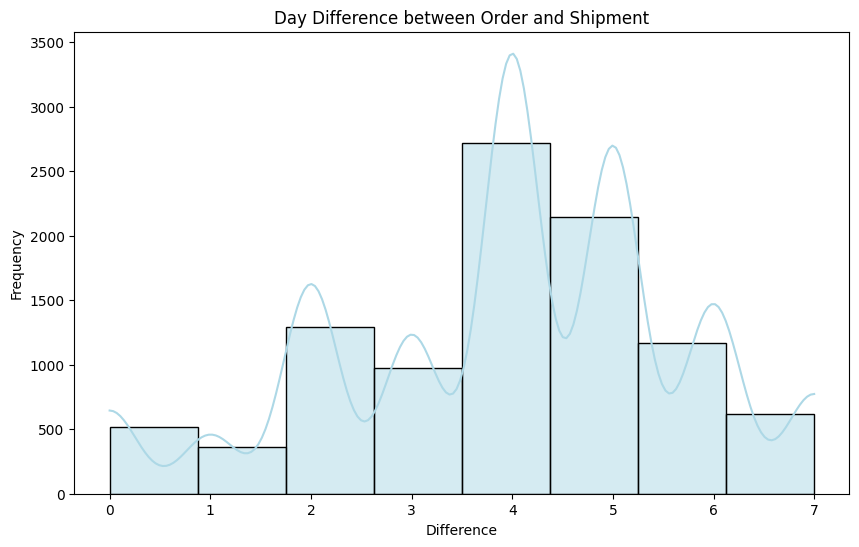

In [15]:

plt.figure(figsize=(10, 6))
sns.histplot(data['Date-Difference'], kde=True, color='lightblue', bins=8)
plt.title('Day Difference between Order and Shipment')
plt.xlabel('Difference')
plt.ylabel('Frequency')

In [16]:
data.groupby('Ship Mode')['Date-Difference'].value_counts()

Ship Mode       Date-Difference
First Class     3                   605
                2                   557
                1                   338
                4                     1
Same Day        0                   514
                1                    24
Second Class    2                   738
                5                   423
                3                   372
                4                   368
                1                     1
Standard Class  4                  2349
                5                  1724
                6                  1170
                7                   615
                3                     1
Name: Date-Difference, dtype: int64

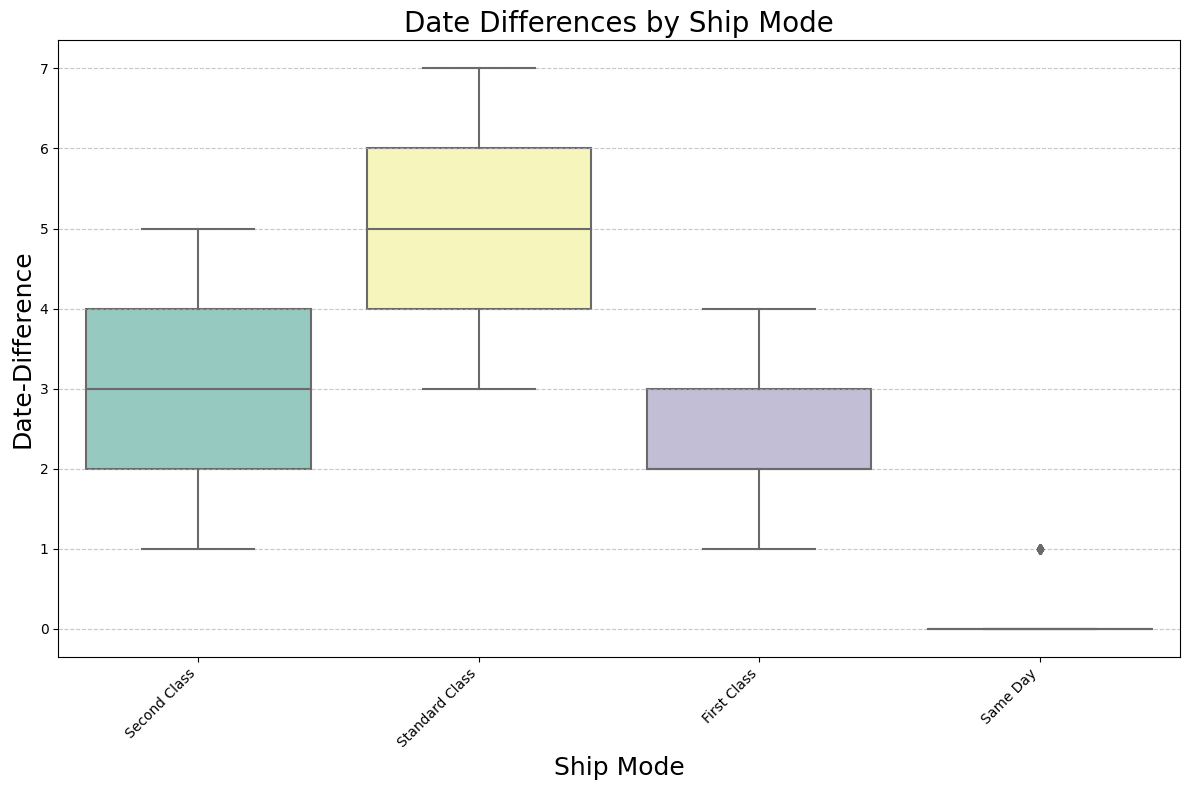

In [17]:
# Visualisation of the Date Differences grouped by the Shipping Mode

plt.figure(figsize=(12, 8))

# Use the 'hue' parameter to add color differentiation by 'Ship Mode'
sns.boxplot(x='Ship Mode', y='Date-Difference', data=data, palette='Set3')

# Adding labels and title
plt.title('Date Differences by Ship Mode', fontsize=20)
plt.xlabel('Ship Mode', fontsize=18)
plt.ylabel('Date-Difference', fontsize=18)

# Adding grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customizing x-axis ticks
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [18]:

data['OrderWeekday'] = data['Order Date'].dt.day_name()
data['OrderMonth'] = data['Order Date'].dt.month
data['OrderYear'] = data['Order Date'].dt.year
data['OrderYearMonth'] = data['Order Date'].apply(lambda x: x.strftime('%Y%m'))

In [19]:
print('Orders By Weekday Count', data['OrderWeekday'].value_counts())
print()

print('Orders By Monthly Count', data['OrderMonth'].value_counts())
print()

print('Orders By Yearly Count', data['OrderYear'].value_counts())

Orders By Weekday Count Tuesday      1889
Saturday     1786
Sunday       1695
Monday       1593
Wednesday    1229
Friday       1067
Thursday      541
Name: OrderWeekday, dtype: int64

Orders By Monthly Count 11    1449
12    1382
9     1354
10     809
5      725
7      697
8      693
6      691
3      680
4      657
1      366
2      297
Name: OrderMonth, dtype: int64

Orders By Yearly Count 2018    3258
2017    2534
2016    2055
2015    1953
Name: OrderYear, dtype: int64


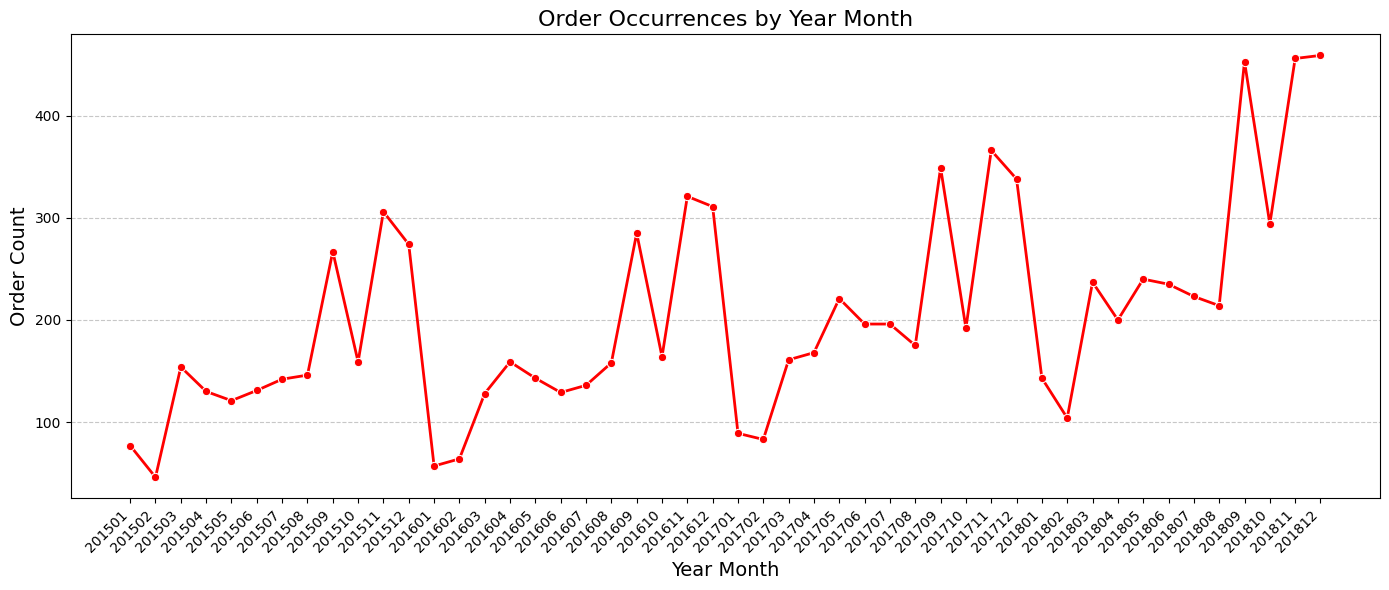

In [20]:
plt.figure(figsize=(14, 6))

# Calculate order counts by year-month and sort the index
order_counts = data['OrderYearMonth'].value_counts().sort_index()

# Use a line plot with markers for better visualization
sns.lineplot(x=order_counts.index, y=order_counts.values, marker='o', color='red', linewidth=2)

# Adding labels and title
plt.title('Order Occurrences by Year Month', fontsize=16)
plt.xlabel('Year Month', fontsize=14)
plt.ylabel('Order Count', fontsize=14)

# Customizing x-axis ticks for improved readability
plt.xticks(rotation=45, ha='right')

# Adding grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

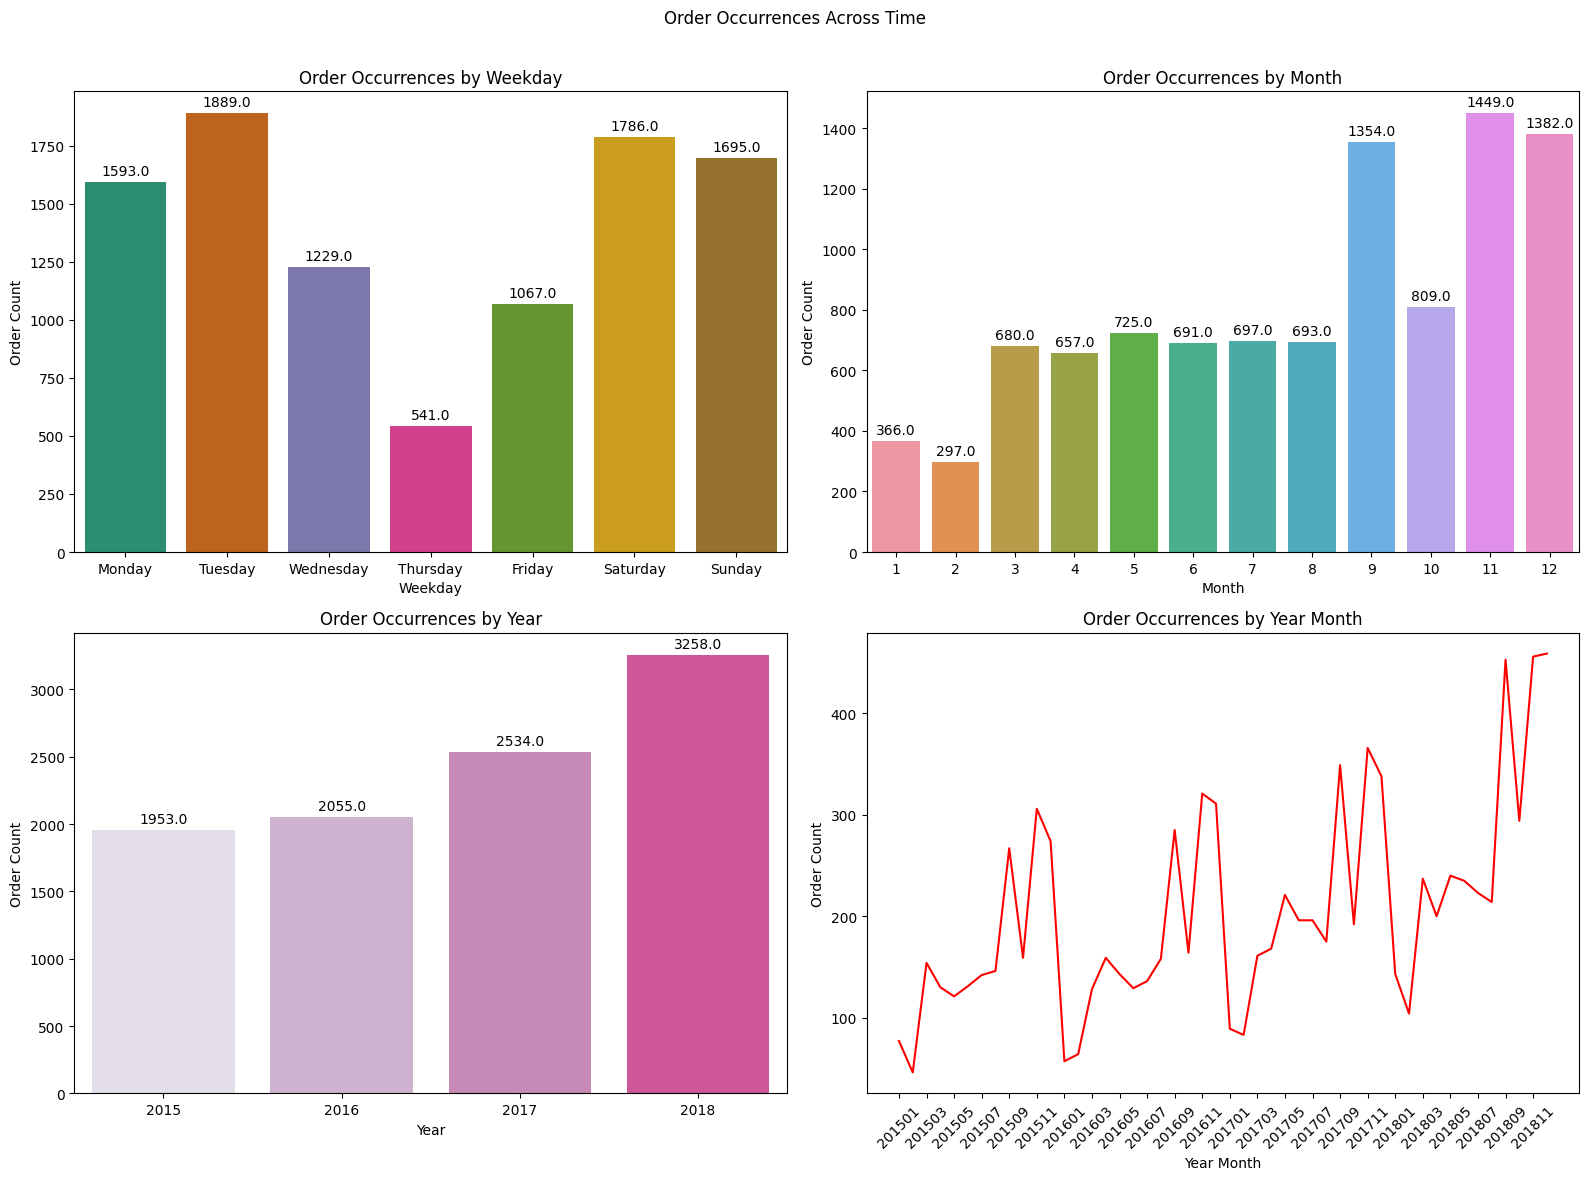

In [21]:
palette_dark2 = sns.color_palette('Dark2')
palette_purd = sns.color_palette('PuRd')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
fig.suptitle('Order Occurrences Across Time')

# 1. Order Occurrences by Weekday
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", 'Sunday']
sns.countplot(x='OrderWeekday', data=data, order=order, ax=axes[0, 0], palette=palette_dark2)
axes[0, 0].set_title('Order Occurrences by Weekday')
axes[0, 0].set_xlabel('Weekday')
axes[0, 0].set_ylabel('Order Count')
# Adding annotations
for p in axes[0, 0].patches:
    axes[0, 0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

# 2. Order Occurrences by Month
sns.countplot(x='OrderMonth', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Order Occurrences by Month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Order Count')
# Adding annotations
for p in axes[0, 1].patches:
    axes[0, 1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

# 3. Order Occurrences by Year
sns.countplot(x='OrderYear', data=data, ax=axes[1, 0], palette=palette_purd)
axes[1, 0].set_title('Order Occurrences by Year')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Order Count')
# Adding annotations
for p in axes[1, 0].patches:
    axes[1, 0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

# 4. Order Occurrences by Year Month
order_counts = data['OrderYearMonth'].value_counts().sort_index()
sns.lineplot(x=order_counts.index, y=order_counts.values, ax=axes[1, 1], color='red')
axes[1, 1].set_xticks(axes[1, 1].get_xticks()[::2])
axes[1, 1].tick_params(axis='x', rotation=45, labelright=True)
axes[1, 1].set_xlabel('Year Month')
axes[1, 1].set_ylabel('Order Count')
axes[1, 1].set_title('Order Occurrences by Year Month')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [22]:

data['ShipmentMonth'] = data['Ship Date'].dt.month
data['ShipmentWeekday'] = data['Ship Date'].dt.day_name()

In [23]:
print('Shipment By Weekday Count', 
      data['ShipmentWeekday'].value_counts())
print()

print('Shipment By Monthly Count', 
      data['ShipmentMonth'].value_counts())

Shipment By Weekday Count Thursday     1565
Saturday     1498
Sunday       1474
Wednesday    1433
Friday       1420
Monday       1236
Tuesday      1174
Name: ShipmentWeekday, dtype: int64

Shipment By Monthly Count 11    1414
12    1384
9     1337
10     811
6      740
7      707
5      684
8      660
4      641
3      634
1      464
2      324
Name: ShipmentMonth, dtype: int64


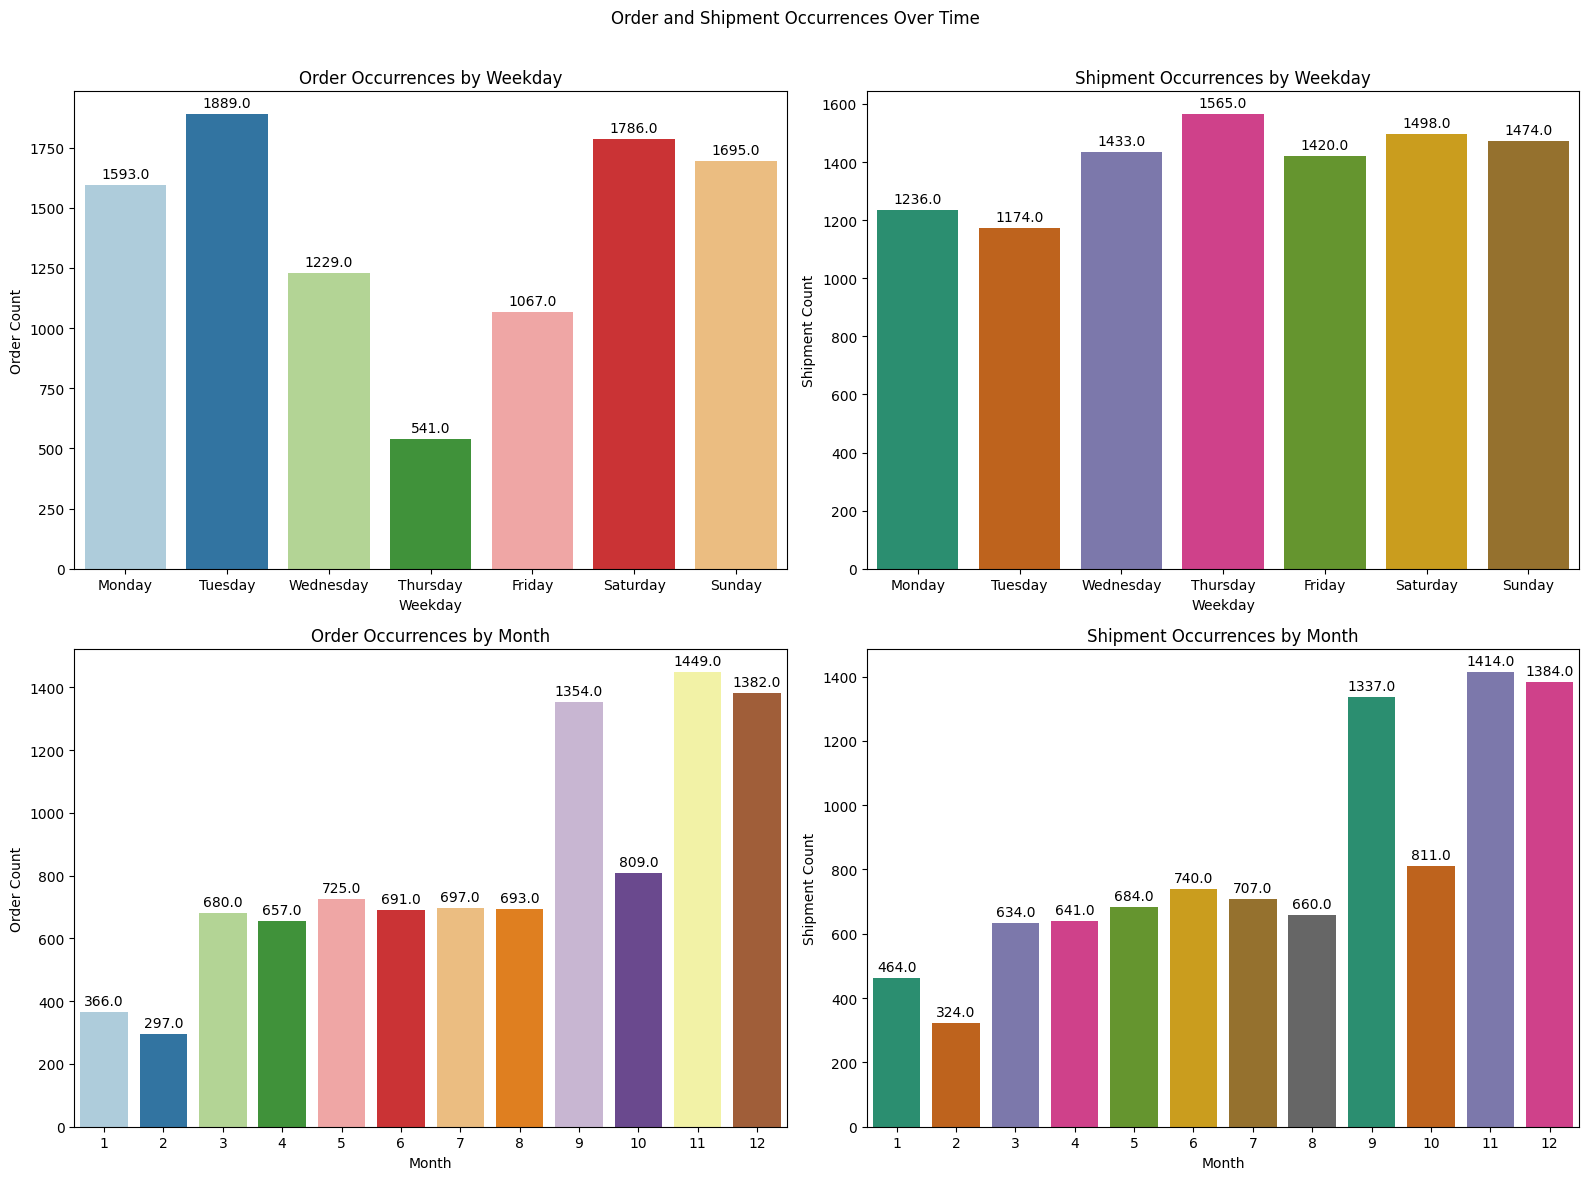

In [24]:
palette_order = sns.color_palette('Paired')
palette_shipment = sns.color_palette('Dark2')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
fig.suptitle('Order and Shipment Occurrences Over Time')

# 1. Order Occurrences by Weekday
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", 'Sunday']
sns.countplot(x='OrderWeekday', data=data, order=order, ax=axes[0, 0], palette=palette_order)
axes[0, 0].set_title('Order Occurrences by Weekday')
axes[0, 0].set_xlabel('Weekday')
axes[0, 0].set_ylabel('Order Count')
# Adding annotations
for p in axes[0, 0].patches:
    axes[0, 0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

# 2. Shipment Occurrences by Weekday
sns.countplot(x='ShipmentWeekday', data=data, order=order, ax=axes[0, 1], palette=palette_shipment)
axes[0, 1].set_title('Shipment Occurrences by Weekday')
axes[0, 1].set_xlabel('Weekday')
axes[0, 1].set_ylabel('Shipment Count')
# Adding annotations
for p in axes[0, 1].patches:
    axes[0, 1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

# 3. Order Occurrences by Month
sns.countplot(x='OrderMonth', data=data, ax=axes[1, 0], palette=palette_order)
axes[1, 0].set_title('Order Occurrences by Month')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Order Count')
# Adding annotations
for p in axes[1, 0].patches:
    axes[1, 0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

# 4. Shipment Occurrences by Month
sns.countplot(x='ShipmentMonth', data=data, ax=axes[1, 1], palette=palette_shipment)
axes[1, 1].set_title('Shipment Occurrences by Month')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Shipment Count')
# Adding annotations
for p in axes[1, 1].patches:
    axes[1, 1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

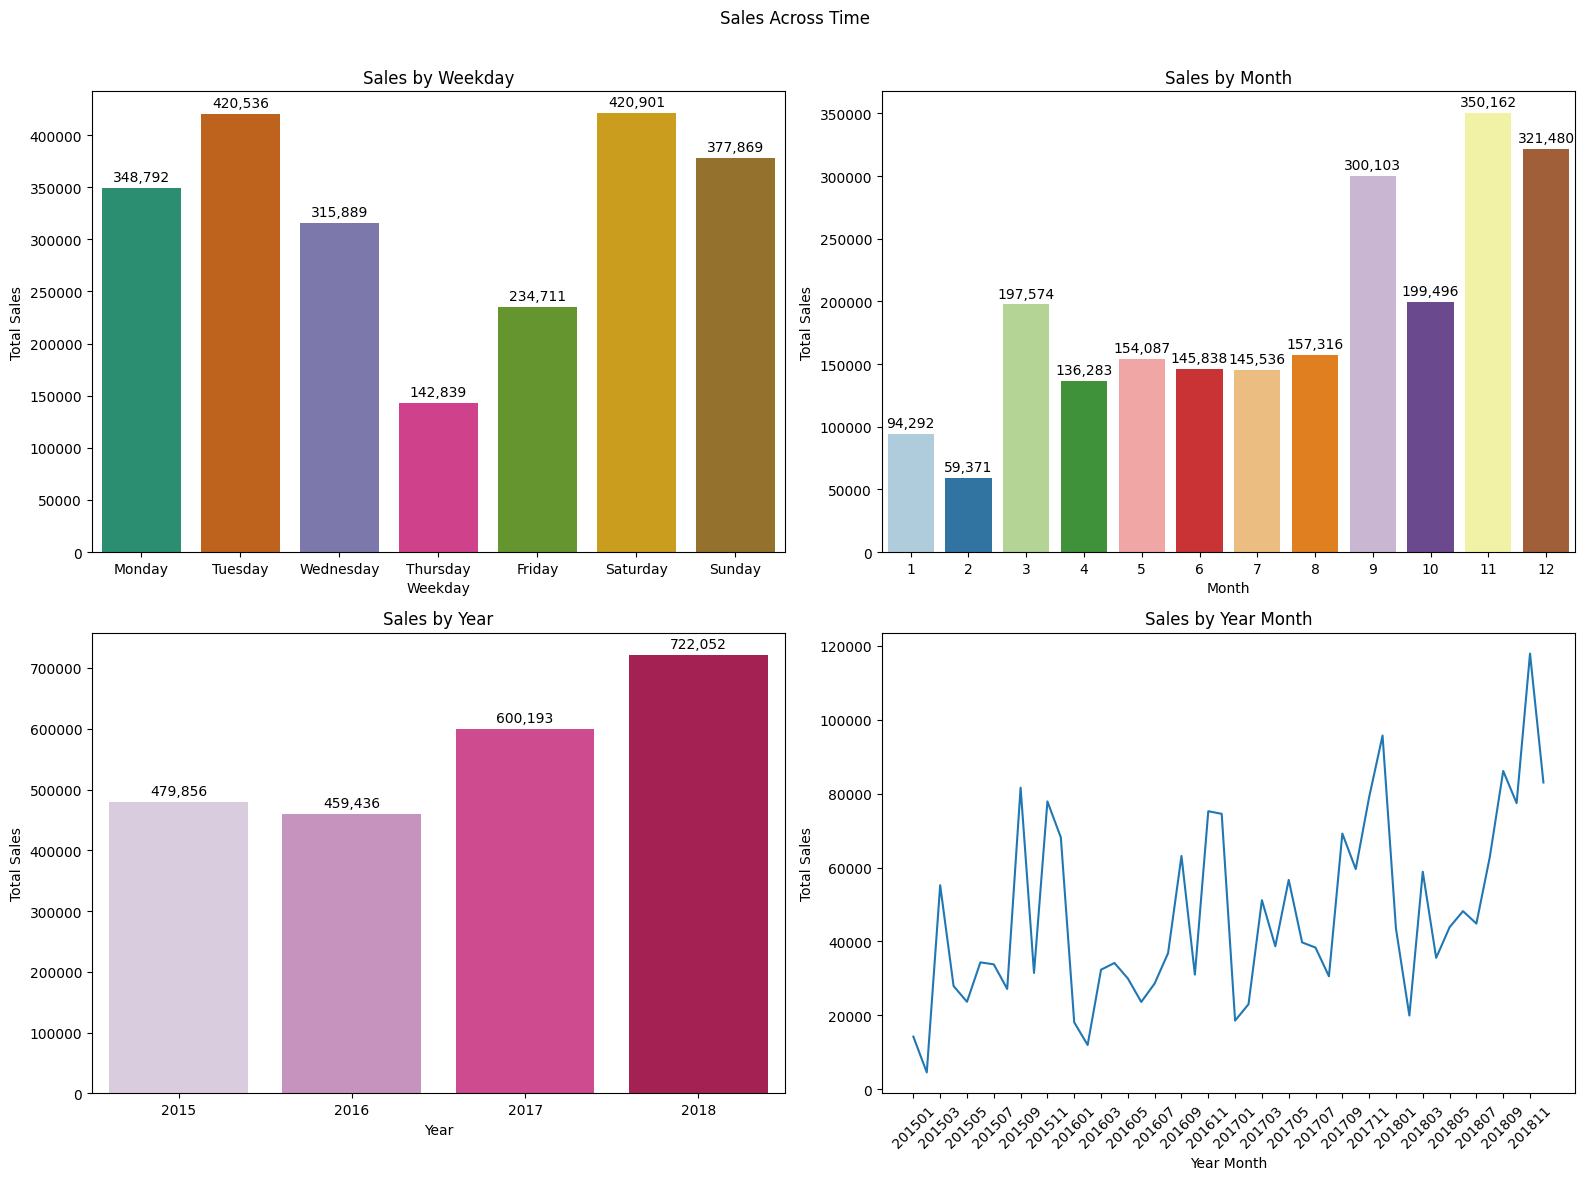

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
fig.suptitle('Sales Across Time')

# 1. Sales by Weekday
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", 'Sunday']
sales_by_weekday = data.groupby('OrderWeekday')['Sales'].sum().reindex(order)

sns.barplot(x=sales_by_weekday.index, y=sales_by_weekday.values, ax=axes[0, 0], 
            palette='Dark2', estimator=sum, errorbar=None)
axes[0, 0].set_title('Sales by Weekday')
axes[0, 0].set_xlabel('Weekday')
axes[0, 0].set_ylabel('Total Sales')
# Adding annotations
for p in axes[0, 0].patches:
    axes[0, 0].annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

# 2. Sales by Month
sales_by_month = data.groupby('OrderMonth')['Sales'].sum()

sns.barplot(x=sales_by_month.index, y=sales_by_month.values, ax=axes[0, 1], palette='Paired',estimator=sum, errorbar=None)
axes[0, 1].set_title('Sales by Month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Total Sales')
# Adding annotations
for p in axes[0, 1].patches:
    axes[0, 1].annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

# 3. Sales by Year
sales_by_year = data.groupby('OrderYear')['Sales'].sum()

sns.barplot(x=sales_by_year.index, y=sales_by_year.values, ax=axes[1, 0], palette='PuRd', estimator=sum, errorbar=None)
axes[1, 0].set_title('Sales by Year')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Total Sales')
# Adding annotations
for p in axes[1, 0].patches:
    axes[1, 0].annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

# 4. Sales by Year Month
sales_by_year_month = data.groupby('OrderYearMonth')['Sales'].sum().reset_index()

sns.lineplot(data=sales_by_year_month, x='OrderYearMonth', y='Sales', ax=axes[1, 1])
axes[1, 1].set_xticks(axes[1, 1].get_xticks()[::2])  
axes[1, 1].tick_params(axis='x', rotation=45, labelright=True)
axes[1, 1].set_xlabel('Year Month')
axes[1, 1].set_ylabel('Total Sales')
axes[1, 1].set_title('Sales by Year Month')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [26]:
print('Data Shape:', data.shape)
print('Unique Order ID:', data['Order ID'].unique().shape[0])
print('Unique Customers:', data['Customer ID'].unique().shape[0])

Data Shape: (9800, 22)
Unique Order ID: 4922
Unique Customers: 793


In [27]:
customer_sales = data.groupby('Customer Name')['Sales'].sum().reset_index()

customer_sales.sort_values(by='Sales', ascending=False).head(10)

Customer Name      Sales
686         Sean Miller  25043.050
730        Tamara Chand  19052.218
622        Raymond Buch  15117.339
757        Tom Ashbrook  14595.620
6         Adrian Barton  14473.571
441        Ken Lonsdale  14175.229
671        Sanjit Chand  14142.334
334        Hunter Lopez  12873.298
672        Sanjit Engle  12209.438
156  Christopher Conant  12129.072

In [28]:
# 1. Storing top customers into a variable
top_customers_data = customer_sales.sort_values(by='Sales', ascending=False).head(7)

# 2. Extracting the Customer Names
top_customer_ids = top_customers_data['Customer Name']

# 3. Filtering the original dataset based on the required customer names
filtered_data = data[data['Customer Name'].isin(top_customer_ids)]

# 4. Grouping the filtered dataset by category' and Sub-Category and using the count func
category_counts = filtered_data.groupby(['Category', 'Sub-Category']).size().reset_index(name='Count')

category_counts

Category Sub-Category  Count
0         Furniture    Bookcases      1
1         Furniture       Chairs      4
2         Furniture  Furnishings     18
3         Furniture       Tables      2
4   Office Supplies   Appliances      3
5   Office Supplies          Art     12
6   Office Supplies      Binders     21
7   Office Supplies    Envelopes      4
8   Office Supplies    Fasteners      4
9   Office Supplies       Labels      3
10  Office Supplies        Paper     12
11  Office Supplies      Storage     12
12  Office Supplies     Supplies      3
13       Technology  Accessories      7
14       Technology      Copiers      3
15       Technology     Machines      3
16       Technology       Phones     14

In [29]:
fig = px.sunburst(category_counts, path=['Category', 'Sub-Category'], values='Count',
                  title="Top Customers' Purchases by Category and Sub-Category")
fig.show()

In [30]:
data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

Text(0.5, 1.0, 'Customer Segment Distribution')

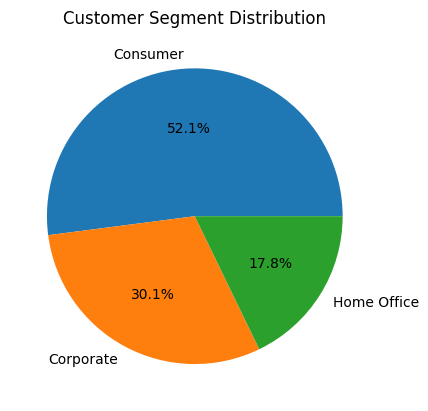

In [31]:
# Visualising Customer Segment data
count_segment = data['Segment'].value_counts()

plt.pie(count_segment, labels= count_segment.index, autopct='%1.1f%%')
plt.title('Customer Segment Distribution')

In [32]:
by_segment = data.groupby('Segment')

In [33]:
by_segment['Sales'].sum()

Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: Sales, dtype: float64

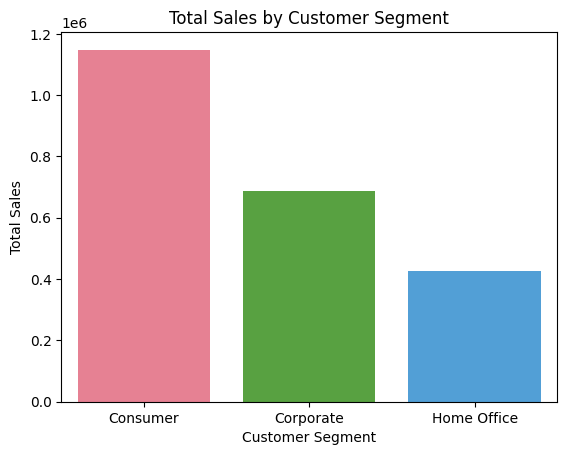

In [34]:
# Visualising the results

sales_by_segment = by_segment['Sales'].sum().reset_index()

sns.barplot(x='Segment', y='Sales', data=sales_by_segment, palette='husl')
plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.show()

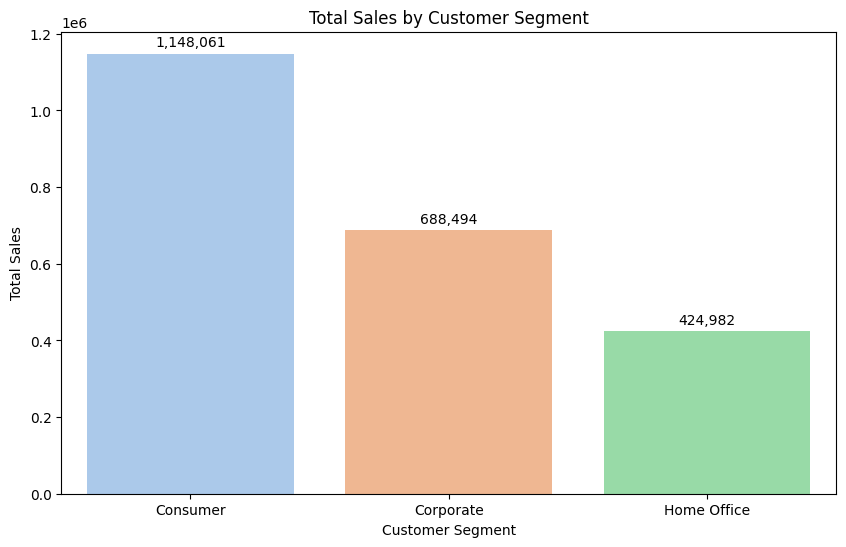

In [35]:
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x='Segment', y='Sales', data=sales_by_segment, palette='pastel')

# Add annotations
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

# Customize the plot
plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')

plt.show()

In [36]:
data['Country'].unique()

array(['United States'], dtype=object)

In [37]:
data['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [38]:
unique_states_count = data['State'].nunique()
print(f"Number of states in the dataset: {unique_states_count}")

Number of states in the dataset: 49


In [39]:
by_state = data.groupby('State')
by_state['Sales'].sum() 

State
Alabama                  19510.6400
Arizona                  35272.6570
Arkansas                 11678.1300
California              446306.4635
Colorado                 31841.5980
Connecticut              13384.3570
Delaware                 27322.9990
District of Columbia      2865.0200
Florida                  88436.5320
Georgia                  48219.1100
Idaho                     4382.4860
Illinois                 79236.5170
Indiana                  48718.4000
Iowa                      4443.5600
Kansas                    2914.3100
Kentucky                 36458.3900
Louisiana                 9131.0500
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            28634.4340
Michigan                 76136.0740
Minnesota                29863.1500
Mississippi              10771.3400
Missouri                 22205.1500
Montana                   5589.3520
Nebraska                  7464.9300
Nevada                   16729.1020
New Hampshire         

In [40]:
sales_state = by_state['Sales'].sum().reset_index() 
sales_state.head()

State        Sales
0     Alabama   19510.6400
1     Arizona   35272.6570
2    Arkansas   11678.1300
3  California  446306.4635
4    Colorado   31841.5980

In [41]:
sales_state.sort_values(by='Sales', ascending=False).head()

State        Sales
3     California  446306.4635
30      New York  306361.1470
41         Texas  168572.5322
45    Washington  135206.8500
36  Pennsylvania  116276.6500

In [42]:
sales_state.sort_values(by='Sales', ascending=True).head()

State     Sales
32   North Dakota   919.910
46  West Virginia  1209.824
17          Maine  1270.530
39   South Dakota  1315.560
48        Wyoming  1603.136

In [44]:
data["City"].unique()
unique_city_count = data['City'].nunique()
print(f"Number of cities in the dataset: {unique_city_count}")

Number of cities in the dataset: 529


In [45]:
by_city= data.groupby(['State', 'City'])
by_city['Sales'].sum()

State      City      
Alabama    Auburn        1766.830
           Decatur       3374.820
           Florence      1997.350
           Hoover         525.850
           Huntsville    2484.370
                           ...   
Wisconsin  Superior      1299.730
           Waukesha        54.500
           Wausau         317.480
           West Allis     250.480
Wyoming    Cheyenne      1603.136
Name: Sales, Length: 600, dtype: float64

In [46]:
sales_city = by_city['Sales'].sum().reset_index() 
sales_city

State        City     Sales
0      Alabama      Auburn  1766.830
1      Alabama     Decatur  3374.820
2      Alabama    Florence  1997.350
3      Alabama      Hoover   525.850
4      Alabama  Huntsville  2484.370
..         ...         ...       ...
595  Wisconsin    Superior  1299.730
596  Wisconsin    Waukesha    54.500
597  Wisconsin      Wausau   317.480
598  Wisconsin  West Allis   250.480
599    Wyoming    Cheyenne  1603.136

[600 rows x 3 columns]

In [47]:
sales_city.sort_values(by='Sales', ascending=False).head()

State           City       Sales
387      New York  New York City  252462.547
62     California    Los Angeles  173420.181
582    Washington        Seattle  116106.322
89     California  San Francisco  109041.120
460  Pennsylvania   Philadelphia  108841.749

In [48]:
sales_city.sort_values(by='Sales', ascending=True).head()

State          City  Sales
491    Texas       Abilene  1.392
423     Ohio        Elyria  1.824
153  Florida       Jupiter  2.064
165  Florida     Pensacola  2.214
162  Florida  Ormond Beach  2.808

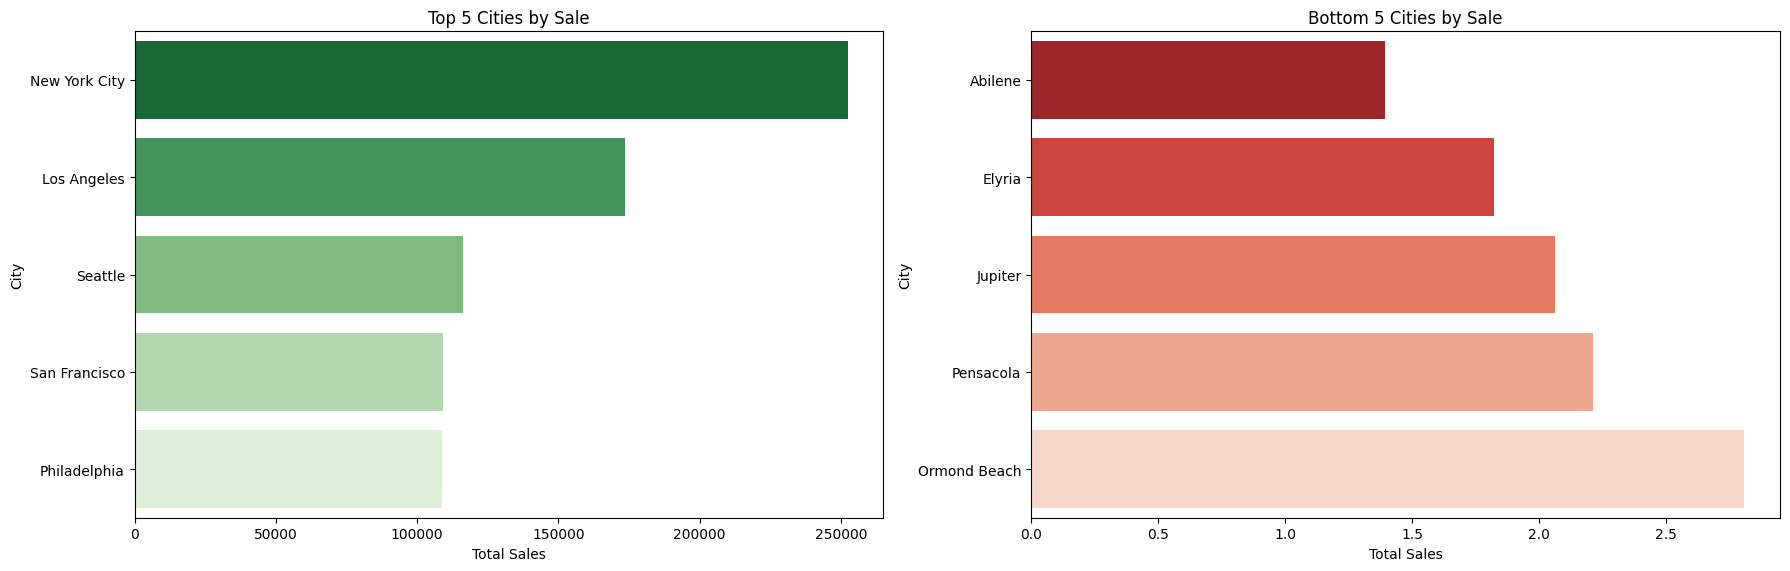

In [49]:
# Sorting the data for both top and bottom cities
sales_city_top = sales_city.sort_values(by='Sales', ascending=False).head()
sales_city_bottom = sales_city.sort_values(by='Sales', ascending=True).head()

# Creating a visualisation
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Top Cities (Green Hues)
sns.barplot(x='Sales', y='City', data=sales_city_top, ax=axes[0], palette='Greens_r')
axes[0].set_title('Top 5 Cities by Sale')
axes[0].set_xlabel('Total Sales')
axes[0].set_ylabel('City')

# Bottom Cities (Red Hues)
sns.barplot(x='Sales', y='City', data=sales_city_bottom, ax=axes[1], palette='Reds_r')
axes[1].set_title('Bottom 5 Cities by Sale')
axes[1].set_xlabel('Total Sales')
axes[1].set_ylabel('City')

# Adjusting the layout to avoid overlapping charts
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

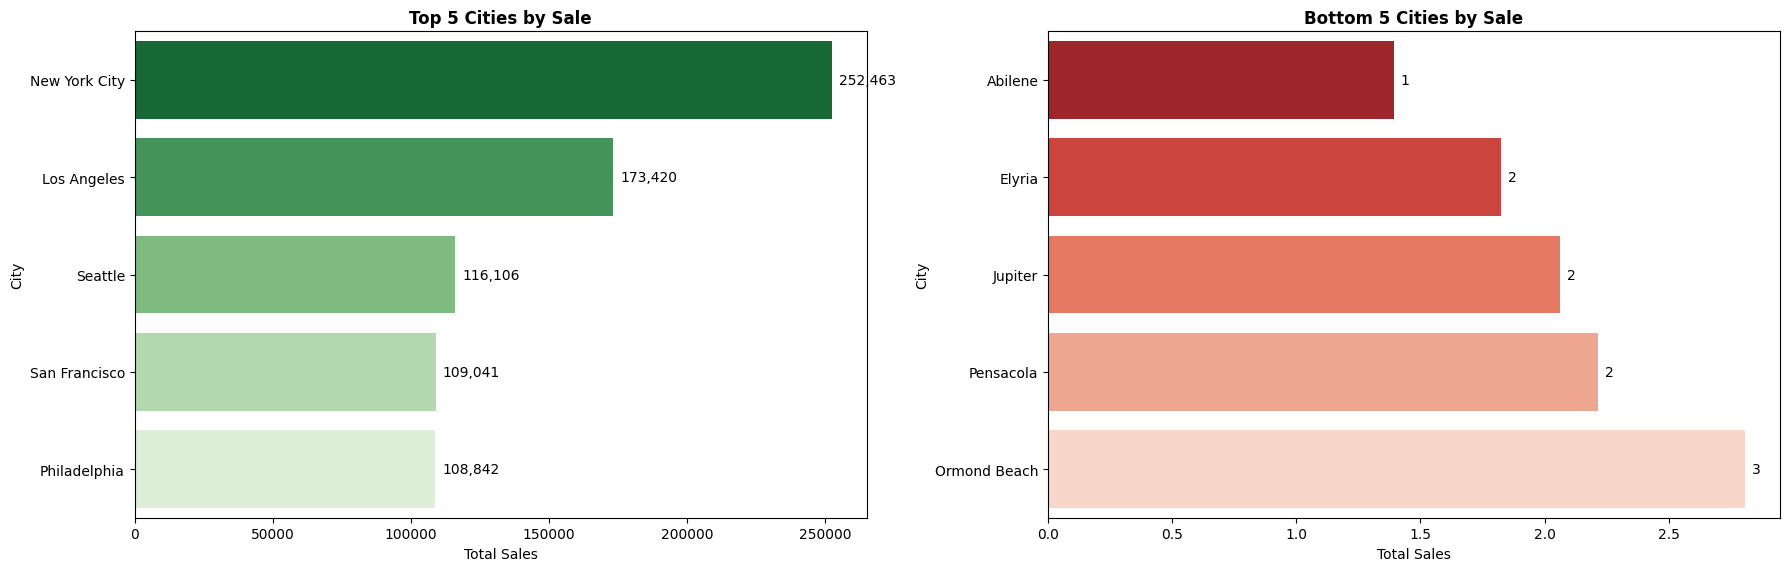

In [50]:
sales_city_top = sales_city_top.sort_values(by='Sales', ascending=False)
sales_city_bottom = sales_city_bottom.sort_values(by='Sales', ascending=True)

# Creating a visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Top Cities (Green Hues)
sns.barplot(x='Sales', y='City', data=sales_city_top, ax=axes[0], palette='Greens_r')

# Adding annotations for top cities
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                     ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                     textcoords='offset points')

axes[0].set_title('Top 5 Cities by Sale', fontweight='bold')
axes[0].set_xlabel('Total Sales')
axes[0].set_ylabel('City')

# Bottom Cities (Red Hues)
sns.barplot(x='Sales', y='City', data=sales_city_bottom, ax=axes[1], palette='Reds_r')

# Adding annotations for bottom cities
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                     ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                     textcoords='offset points')

axes[1].set_title('Bottom 5 Cities by Sale', fontweight='bold')
axes[1].set_xlabel('Total Sales')
axes[1].set_ylabel('City')

# Adjusting the layout to avoid overlapping charts
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [51]:
data['Region'].unique()
by_region = data.groupby('Region')
by_region['Sales'].sum()

Region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64

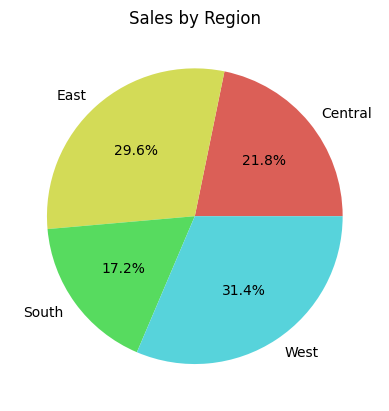

In [52]:
# Creating a visualisation
sales_by_region = by_region['Sales'].sum()

sns.set_palette('hls')
plt.pie(sales_by_region, labels=sales_by_region.index, autopct='%1.1f%%')
plt.title('Sales by Region')
plt.show()

In [53]:
by_regionstate = data.groupby(['Region', 'State'])
by_regionstate['Sales'].sum()

Region   State               
Central  Illinois                 79236.5170
         Indiana                  48718.4000
         Iowa                      4443.5600
         Kansas                    2914.3100
         Michigan                 76136.0740
         Minnesota                29863.1500
         Missouri                 22205.1500
         Nebraska                  7464.9300
         North Dakota               919.9100
         Oklahoma                 19683.3900
         South Dakota              1315.5600
         Texas                   168572.5322
         Wisconsin                31173.4300
East     Connecticut              13384.3570
         Delaware                 27322.9990
         District of Columbia      2865.0200
         Maine                     1270.5300
         Maryland                 23705.5230
         Massachusetts            28634.4340
         New Hampshire             7292.5240
         New Jersey               34610.9720
         New York        

In [54]:
# Creating a visualisation

sales_regionstate = data.groupby(['Region', 'State'])['Sales'].sum().reset_index()

fig = px.bar(sales_regionstate, x='Region', y='Sales', color='State', title='Total Sales by Region and State')
fig.show()

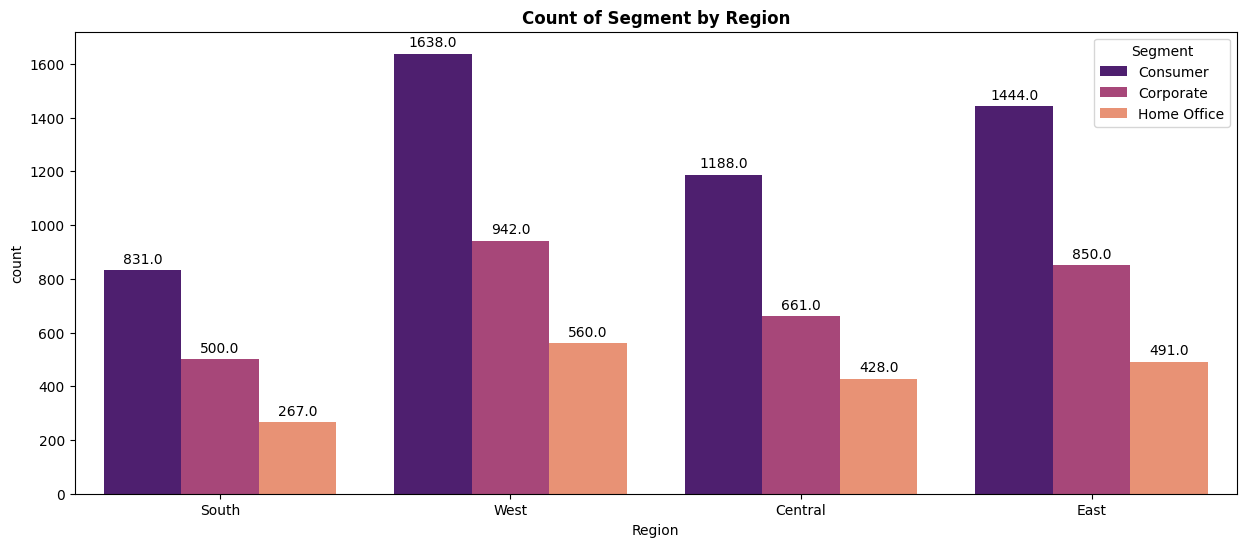

In [55]:
# Creating a visualisation

plt.figure(figsize=(15, 6))

# Create the count plot
ax = sns.countplot(data=data, x='Region', hue='Segment', palette='magma')

# Add annotations above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Count of Segment by Region', fontweight='bold')
plt.show()

In [56]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [57]:
by_category = data.groupby('Category')
by_category['Sales'].sum()

Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64

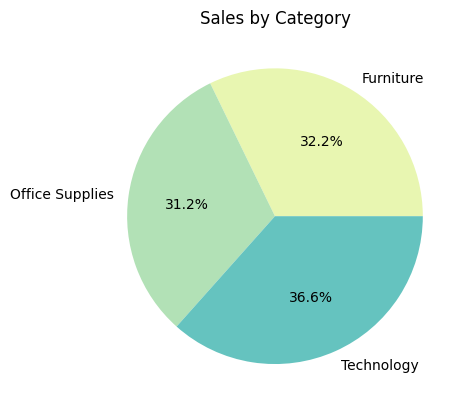

In [58]:
# Creating a visualisation
sales_by_category = by_category['Sales'].sum()

sns.set_palette("YlGnBu")
plt.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%')
plt.title('Sales by Category')
plt.show()

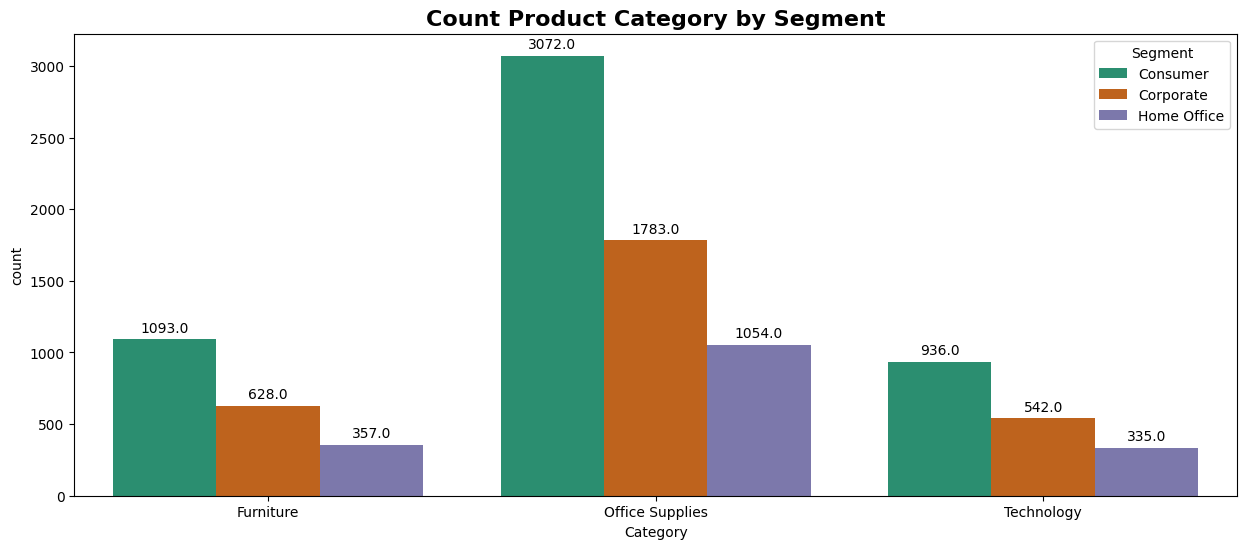

In [59]:
 # Creating a visualisation
plt.figure(figsize=(15, 6))

# Create the count plot
ax = sns.countplot(data=data, x='Category', hue='Segment', palette='Dark2')

# Add annotations above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Customize the title
plt.title('Count Product Category by Segment', fontsize=16, fontweight='bold')

plt.show()

In [60]:
by_subcat= data.groupby(['Category', 'Sub-Category'])

In [61]:
by_subcat['Sales'].sum()

Category         Sub-Category
Furniture        Bookcases       113813.1987
                 Chairs          322822.7310
                 Furnishings      89212.0180
                 Tables          202810.6280
Office Supplies  Appliances      104618.4030
                 Art              26705.4100
                 Binders         200028.7850
                 Envelopes        16128.0460
                 Fasteners         3001.9600
                 Labels           12347.7260
                 Paper            76828.3040
                 Storage         219343.3920
                 Supplies         46420.3080
Technology       Accessories     164186.7000
                 Copiers         146248.0940
                 Machines        189238.6310
                 Phones          327782.4480
Name: Sales, dtype: float64

In [62]:
# Creating a visualisation
by_subcat = data.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

fig = px.bar(by_subcat, x='Category', y='Sales', color='Sub-Category', 
             title='Total Sales by Category and Sub-Category')
fig.show()